In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Step 1: Specify the path to your zip file in Google Drive
zip_file_path = '/content/Dataset_Custom-20241121T061416Z-001.zip'
output_folder_path = '/content/'

# Step 2: Unzip the file
import zipfile
import os

# Ensure the output folder exists
os.makedirs(output_folder_path, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(output_folder_path)

print(f"File unzipped to: {output_folder_path}")

File unzipped to: /content/


**1. Importing Libraries for Image Processing and Deep Learning in Python**

1. **Importing numpy**:
   ```python
   import numpy as np
   ```
   * Numpy is imported as `np` to handle numerical computations, particularly with arrays and matrices.

2. **Importing os**:
   ```python
   import os
   ```
   * Used for interacting with the operating system, such as handling file paths and directory operations.

3. **Importing json**:
   ```python
   import json
   ```
   * Used for parsing and generating JSON data, which is often employed for managing image annotations or configurations in machine learning projects.

4. **Importing cv2**:
   ```python
   import cv2
   ```
   * OpenCV is imported as `cv2` to handle advanced image and video processing tasks, including reading, writing, and transforming images.

5. **Importing pandas**:
   ```python
   import pandas as pd
   ```
   * Useful for data manipulation and analysis, often employed in handling tabular data related to image annotations or model performance.

6. **Importing random**:
   ```python
   import random
   ```
   * Used for generating random numbers, often employed in data augmentation or shuffling datasets.

7. **Importing PIL.Image**:
   ```python
   from PIL import Image
   ```
   * From the Python Imaging Library (PIL), `Image` is imported to handle image processing tasks like opening, manipulating, and saving images.

8. **Importing polygon from skimage.draw**:
   ```python
   from skimage.draw import polygon
   ```
   * Used for generating coordinates of pixels inside a polygon, useful in image processing tasks such as annotation or masking.

9. **Importing resize from skimage.transform**:
   ```python
   from skimage.transform import resize
   ```
   * Resizes images to specific dimensions while maintaining aspect ratio, often used for preprocessing images for machine learning models.

10. **Importing matplotlib.pyplot**:
    ```python
    import matplotlib.pyplot as plt
    ```
    * A plotting library used to visualize data, often for displaying images and their transformations during data analysis or debugging.

11. **Importing tensorflow.keras model-related modules**:
    ```python
    from tensorflow.keras.models import Model
    from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, Dropout
    ```
    * Model: A base class for defining neural networks.
    * Input: Used to define the input layer of a model.
    * Conv2D: A layer for applying 2D convolution to an input.
    * MaxPooling2D: A layer for down-sampling feature maps using maximum pooling.
    * UpSampling2D: Used for up-sampling input data, often in decoder architectures.
    * Concatenate: Combines layers or tensors along a specific axis.
    * Conv2DTranspose: Performs transposed convolution (deconvolution) for up-sampling.
    * Dropout: Regularization technique to prevent overfitting by randomly deactivating neurons during training.

12. **Importing tensorflow.keras.optimizers.Adam**:
    ```python
    from tensorflow.keras.optimizers import Adam
    ```
    * A popular optimizer that combines the benefits of AdaGrad and RMSProp, used to adjust the weights of a model during training.

13. **Importing tensorflow.keras.preprocessing.image.ImageDataGenerator**:
    ```python
    from tensorflow.keras.preprocessing.image import ImageDataGenerator
    ```
    * Provides functionality for image augmentation such as rotation, zoom, or flipping, which helps increase the diversity of the training dataset.

14. **Importing sklearn's train_test_split**:
    ```python
    from sklearn.model_selection import train_test_split
    ```
    * Splits data into training and testing sets, useful for evaluating the performance of a machine learning model.

In [ ]:
#######################################################
import numpy as np
import os
import json
import cv2
import pandas as pd
import random
from PIL import Image
from skimage.draw import polygon
from skimage.transform import resize
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import MeanIoU
from sklearn.model_selection import train_test_split
#######################################################


**2. Defining Paths for Data Processing**

1. **Setting image directory path**:
   * The `image_directory` variable specifies the path to the folder containing images for segmentation.  
   ```python
   image_directory = '/content/drive/MyDrive/Resources/4_Image_Segmentation/Dataset_Custom/Image/'
   ```
   * This path will be used to load images for preprocessing and training the model.

2. **Setting mask JSON file path**:
   * The `mask_json_path` variable specifies the path to the VIA JSON file containing annotations for the images.  
   ```python
   mask_json_path = '/content/drive/MyDrive/Resources/4_Image_Segmentation/Dataset_Custom/Brain_Segmentation_Workshop_json_Fix.json'
   ```
   * This file is critical for creating masks from annotated regions for training a segmentation model.

3. **Setting mask save directory**:
   * The `mask_save_directory` variable specifies the folder path where generated masks will be saved.  
   ```python
   mask_save_directory = '/content/Masks/'
   ```
   * Masks generated from annotations will be stored in this directory for later use.

4. **Printing contents of the image directory**:
   * The `os.listdir()` function is used to list all files and folders in the `image_directory`. This helps verify the files present and troubleshoot potential path issues.  
   ```python
   print(f"Image directory contents: {os.listdir(image_directory)}")
   ```
   * The output provides an overview of the available image files for processing.

In [ ]:
#######################################################
# Paths to data
image_directory = '/content/Dataset_Custom/Image/'  # Path to images
mask_json_path = '/content/Dataset_Custom/Brain_Segmentation_Workshop_json_Fix.json'  # Path to VIA JSON
mask_save_directory = '/content/Masks/'  # Path to save masks
print(f"Image directory contents: {os.listdir(image_directory)}")
#######################################################


Image directory contents: ['59.png', '85.png', '74.png', '15.png', '34.png', '100.png', '82.png', '78.png', '99.png', '93.png', '13.png', '31.png', '57.png', '32.png', '5.png', '88.png', '26.png', '14.png', '9.png', '51.png', '33.png', '39.png', '90.png', '56.png', '25.png', '24.png', '84.png', '20.png', '55.png', '60.png', '36.png', '76.png', '21.png', '64.png', '71.png', '81.png', '62.png', '44.png', '29.png', '61.png', '87.png', '35.png', '46.png', '41.png', '77.png', '92.png', '48.png', '47.png', '38.png', '8.png', '83.png', '52.png', '10.png', '91.png', '45.png', '80.png', '17.png', '23.png', '58.png', '18.png', '40.png', '53.png', '43.png', '94.png', '30.png', '70.png', '89.png', '19.png', '28.png', '67.png', '11.png', '27.png', '49.png', '73.png', '68.png', '54.png', '97.png', '65.png', '7.png', '42.png', '4.png', '50.png', '69.png', '66.png', '3.png', '96.png', '95.png', '2.png', '16.png', '37.png', '79.png', '75.png', '72.png', '12.png', '63.png', '1.png', '6.png', '22.png', '

**3. Ensuring Directory Structure and Defining Utility Functions**

1. **Ensuring mask save directory exists**:
   * The `os.makedirs()` function creates the specified directory if it does not already exist.
   ```python
   os.makedirs(mask_save_directory, exist_ok=True)
   ```
   * The `exist_ok=True` parameter ensures no error is raised if the directory already exists, preventing interruptions in the script.

2. **Function to create binary mask from polyline data**:
   * The `create_mask_from_polyline` function generates a binary mask from polygon coordinates (x and y points).
   ```python
   def create_mask_from_polyline(image_shape, points_x, points_y):
       mask = np.zeros(image_shape[:2], dtype=np.uint8)
       rr, cc = polygon(points_y, points_x)
       rr = np.clip(rr, 0, image_shape[0] - 1)
       cc = np.clip(cc, 0, image_shape[1] - 1)
       mask[rr, cc] = 1
       return mask
   ```
   * **Parameters**:
     - `image_shape`: Shape of the image to determine mask dimensions.
     - `points_x` and `points_y`: Arrays of x and y coordinates defining the polygon.
   * **Process**:
     - A zero-initialized array of the image dimensions is created.
     - The `polygon()` function calculates the rows (`rr`) and columns (`cc`) inside the polygon.
     - The `np.clip()` ensures polygon coordinates are within image boundaries.
     - The pixels inside the polygon are set to 1, representing the mask.

3. **Loading JSON annotations**:
   * The `json.load()` function loads annotations from the VIA JSON file containing segmentation data.
   ```python
   with open(mask_json_path, 'r') as f:
       annotations = json.load(f)
   ```
   * This step prepares the annotations for further processing, such as creating masks or mapping them to images.

In [ ]:
#######################################################
# Ensure mask save directory exists
os.makedirs(mask_save_directory, exist_ok=True)

# Function to create binary mask from polyline data
def create_mask_from_polyline(image_shape, points_x, points_y):
    mask = np.zeros(image_shape[:2], dtype=np.uint8)
    rr, cc = polygon(points_y, points_x)
    rr = np.clip(rr, 0, image_shape[0] - 1)
    cc = np.clip(cc, 0, image_shape[1] - 1)
    mask[rr, cc] = 1
    return mask

# Load JSON annotations
with open(mask_json_path, 'r') as f:
    annotations = json.load(f)
#######################################################

**4. Processing Images and Generating Masks**

1. **Start processing images**:
   * A message is printed to indicate the beginning of image and mask processing.
   ```python
   print("Processing images and generating masks...")
   ```

2. **Iterating through JSON annotations**:
   * The script loops through the keys and values of the `annotations` dictionary to process each image.
   ```python
   for key, annotation in annotations.items():
       filename = annotation['filename']
   ```

3. **Debugging with filename**:
   * The filename of the current image from the JSON is printed for troubleshooting.
   ```python
   print(f"Filename from JSON: {filename}")
   ```

4. **Constructing the image path**:
   * The full path to the image is created using `os.path.join()` and normalized for cross-platform compatibility with `os.path.normpath()`.
   ```python
   image_path = os.path.normpath(os.path.join(image_directory, filename))
   ```

5. **Debugging with image path**:
   * The generated image path is printed to ensure the correct path is used.
   ```python
   print(f"Generated image path: {image_path}")
   ```

6. **Checking if the image exists**:
   * A check is performed using `os.path.exists()` to ensure the image file exists before processing.
   ```python
   if os.path.exists(image_path):
       print(f"Processing: {filename}")
   ```

7. **Loading the image**:
   * The image is opened using `PIL.Image` and converted to an RGB array.
   ```python
   image = Image.open(image_path).convert("RGB")
   image = np.array(image)
   original_shape = image.shape
   ```

8. **Initializing an empty mask**:
   * An empty mask of the same dimensions as the image is created using `np.zeros()`.
   ```python
   mask = np.zeros(original_shape[:2], dtype=np.uint8)
   ```

9. **Checking for regions in the annotation**:
   * If no regions are found in the annotation, a message is printed and the loop continues to the next image.
   ```python
   if 'regions' not in annotation or not annotation['regions']:
       print(f"No regions found for {filename}")
       continue
   ```

10. **Generating the mask from regions**:
    * For each region in the annotation, the shape attributes are extracted, and a mask is created using `create_mask_from_polyline`.
    ```python
    for region in annotation['regions']:
        shape_attributes = region['shape_attributes']
        points_x = shape_attributes['all_points_x']
        points_y = shape_attributes['all_points_y']
        print(f"Region points: X={points_x}, Y={points_y}")

        region_mask = create_mask_from_polyline(original_shape, points_x, points_y)
        if region_mask is not None:
            mask += region_mask
    ```

11. **Saving the generated mask**:
    * The mask is saved as a PNG image in the `mask_save_directory`. If an error occurs during saving, it is caught and reported.
    ```python
    try:
        mask_filename = os.path.splitext(os.path.basename(filename))[0] + ".png"
        mask_path = os.path.join(mask_save_directory, mask_filename)
        Image.fromarray((mask * 255).astype(np.uint8)).save(mask_path)
        print(f"Saved mask to {mask_path}")
    except Exception as e:
        print(f"Error saving mask for {filename}: {e}")
    ```

12. **Handling missing images**:
    * If the image file is not found, a warning is printed.
    ```python
    else:
        print(f"Image not found: {image_path}")
    ```

13. **Completion message**:
    * A final message is printed to indicate the processing is complete.
    ```python
    print("Processing complete.")
    ```

In [ ]:
#######################################################
print("Processing images and generating masks...")
for key, annotation in annotations.items():
    filename = annotation['filename']

    # Debug: print the filename from the JSON
    print(f"Filename from JSON: {filename}")

    # Construct the full path to the image
    image_path = os.path.normpath(os.path.join(image_directory, filename))

    # Debug: print the generated image path
    print(f"Generated image path: {image_path}")

    if os.path.exists(image_path):
        print(f"Processing: {filename}")

        # Load the image
        image = Image.open(image_path).convert("RGB")
        image = np.array(image)
        original_shape = image.shape

        # Initialize an empty mask
        mask = np.zeros(original_shape[:2], dtype=np.uint8)

        # Check if regions exist
        if 'regions' not in annotation or not annotation['regions']:
            print(f"No regions found for {filename}")
            continue

        # Process regions to generate the mask
        for region in annotation['regions']:
            shape_attributes = region['shape_attributes']
            points_x = shape_attributes['all_points_x']
            points_y = shape_attributes['all_points_y']
            print(f"Region points: X={points_x}, Y={points_y}")

            # Create mask for the region
            region_mask = create_mask_from_polyline(original_shape, points_x, points_y)
            if region_mask is not None:
                mask += region_mask

        # Save the mask
        try:
            mask_filename = os.path.splitext(os.path.basename(filename))[0] + ".png"
            mask_path = os.path.join(mask_save_directory, mask_filename)
            Image.fromarray((mask * 255).astype(np.uint8)).save(mask_path)
            print(f"Saved mask to {mask_path}")
        except Exception as e:
            print(f"Error saving mask for {filename}: {e}")
    else:
        print(f"Image not found: {image_path}")

print("Processing complete.")
#######################################################

Processing images and generating masks...
Filename from JSON: 1.png
Generated image path: /content/Dataset_Custom/Image/1.png
Processing: 1.png
Region points: X=[269, 281, 296, 305, 312, 316, 319, 322, 334, 358, 367, 371, 376, 378, 380, 379, 375, 373, 371, 369, 365, 359, 348, 327, 312, 308, 300, 295, 293, 295, 293, 292, 288, 285, 284, 284, 281, 276, 270, 270], Y=[235, 254, 258, 257, 255, 252, 246, 240, 238, 235, 232, 228, 217, 215, 212, 207, 199, 188, 184, 182, 179, 176, 176, 190, 203, 207, 209, 220, 227, 231, 234, 235, 235, 233, 231, 230, 229, 228, 231, 235]
Saved mask to /content/Masks/1.png
Filename from JSON: 2.png
Generated image path: /content/Dataset_Custom/Image/2.png
Processing: 2.png
Region points: X=[343, 342, 358, 365, 371, 373, 375, 376, 376, 374, 376, 375, 373, 372, 370, 370, 364, 362, 350, 343, 335, 326, 324, 321, 315, 311, 309, 308, 299, 295, 291, 288, 285, 283, 281, 279, 275, 272, 269, 268, 269, 270, 271, 270, 268, 267, 266, 266, 267, 270, 271, 272, 272, 271, 271, 271,

**5. Defining Paths for Image and Mask Directories**

1. **Setting the image directory path**:
   * The `image_directory` variable specifies the location of the folder containing the input images for segmentation.
   ```python
   image_directory = '/content/drive/MyDrive/Resources/4_Image_Segmentation/Dataset_Custom/Image/'
   ```
   * This directory will be used to load images for processing and generating segmentation masks.

2. **Setting the mask directory path**:
   * The `mask_directory` variable specifies the location where the generated segmentation masks will be saved.
   ```python
   mask_directory = '/content/Masks/'
   ```
   * This ensures all masks are stored in a dedicated directory, facilitating organized access for future use.

In [ ]:
#######################################################
image_directory = '/content/Dataset_Custom/Image'  # Path to images
mask_directory = '/content/Masks/'
#######################################################

**6. Initializing Variables for Dataset Preparation**

1. **Defining the image size**:
   * The `SIZE` variable is set to 256, representing the dimension to which all images and masks will be resized.
   ```python
   SIZE = 256
   ```
   * Standardizing the size of the dataset ensures compatibility with neural networks, which often require fixed input dimensions.

2. **Initializing the image dataset**:
   * The `image_dataset` list is initialized as an empty list to store processed images.
   ```python
   image_dataset = []
   ```
   * This will hold images resized to the defined `SIZE` during preprocessing.

3. **Initializing the mask dataset**:
   * The `mask_dataset` list is initialized as an empty list to store corresponding segmentation masks.
   ```python
   mask_dataset = []
   ```
   * This list will contain masks aligned with the images in `image_dataset`, resized to the same dimensions for proper training.

In [ ]:
#######################################################
SIZE = 256
image_dataset = []  # List to store images
mask_dataset = []   # List to store masks
#######################################################

**7. Loading, Resizing, and Normalizing Images and Masks**

1. **Loading and resizing images from `image_directory`**:
   * The script iterates through all files in the `image_directory`, sorts them to maintain order, and processes only `.png` files.
   ```python
   images = sorted(os.listdir(image_directory))  # Sort to ensure correct order
   for i, image_name in enumerate(images):
       if image_name.split('.')[1] == 'png':  # Ensure correct file format
           image = cv2.imread(os.path.join(image_directory, image_name), 1)  # Read image
           image = Image.fromarray(image)  # Convert to PIL format
           image = image.resize((SIZE, SIZE), Image.NEAREST)  # Resize image
           image_dataset.append(np.array(image))  # Append to list
   ```
   * **Steps**:
     - Files are sorted alphabetically to maintain consistent alignment between images and masks.
     - Each `.png` file is read using OpenCV (`cv2.imread`) and converted to PIL format for resizing.
     - Images are resized to the dimensions specified by `SIZE` (256x256) using `Image.NEAREST` to ensure pixel-level accuracy.
     - Resized images are converted back to NumPy arrays and appended to the `image_dataset` list.

2. **Loading and resizing masks from `mask_directory`**:
   * Similarly, all files in the `mask_directory` are processed, with only `.png` files being considered.
   ```python
   masks = sorted(os.listdir(mask_directory))  # Sort to ensure correct order
   for i, image_name in enumerate(masks):
       if image_name.split('.')[1] == 'png':  # Ensure correct file format
           mask = cv2.imread(os.path.join(mask_directory, image_name), 0)  # Read mask (grayscale)
           mask = Image.fromarray(mask)  # Convert to PIL format
           mask = mask.resize((SIZE, SIZE), Image.NEAREST)  # Resize mask
           mask_dataset.append(np.array(mask))  # Append to list
   ```
   * **Steps**:
     - Masks are loaded in grayscale mode (`cv2.imread` with `0` flag) since they represent binary segmentation.
     - Resizing and appending follow the same logic as for the images, ensuring masks are aligned with their corresponding images.

3. **Normalizing image data**:
   * The `image_dataset` is converted to a NumPy array and normalized by dividing pixel values by 255.0, scaling them to the range [0, 1].
   ```python
   image_dataset = np.array(image_dataset) / 255.0
   ```
   * This step is crucial for neural networks to work efficiently with consistent input ranges.

4. **Normalizing and reshaping mask data**:
   * The `mask_dataset` is converted to a NumPy array and rescaled to [0, 1]. An additional dimension is added using `np.expand_dims()` to match the expected input shape for neural networks.
   ```python
   mask_dataset = np.expand_dims((np.array(mask_dataset)), axis=3) / 255.0
   ```

5. **Debugging dataset size**:
   * The script prints the number of processed images and masks for verification.
   ```python
   print(f'Number of images: {len(image_dataset)}')
   print(f'Number of masks: {len(mask_dataset)}')
   ```

In [ ]:
#######################################################
# Load and resize images from image_directory
images = sorted(os.listdir(image_directory))  # Sort to ensure correct order
for i, image_name in enumerate(images):
    if image_name.split('.')[1] == 'png':  # Ensure correct file format
        image = cv2.imread(os.path.join(image_directory, image_name), 1)  # Read image
        image = Image.fromarray(image)  # Convert to PIL format
        image = image.resize((SIZE, SIZE), Image.NEAREST)  # Resize image
        image_dataset.append(np.array(image))  # Append to list

# Load and resize masks from mask_directory
masks = sorted(os.listdir(mask_directory))  # Sort to ensure correct order
for i, image_name in enumerate(masks):
    if image_name.split('.')[1] == 'png':  # Ensure correct file format
        mask = cv2.imread(os.path.join(mask_directory, image_name), 0)  # Read mask (grayscale)
        mask = Image.fromarray(mask)  # Convert to PIL format
        mask = mask.resize((SIZE, SIZE), Image.NEAREST)  # Resize mask
        mask_dataset.append(np.array(mask))  # Append to list

# Normalize image data
image_dataset = np.array(image_dataset) / 255.0
# Do not normalize masks, just rescale to 0 to 1
mask_dataset = np.expand_dims((np.array(mask_dataset)), axis=3) / 255.0  # Expand dims for mask

# Debug: Check the number of images and masks
print(f'Number of images: {len(image_dataset)}')
print(f'Number of masks: {len(mask_dataset)}')
#######################################################

Number of images: 100
Number of masks: 100


**8. Splitting Dataset into Training and Testing Sets**

1. **Splitting the dataset**:
   * The `train_test_split` function from `sklearn.model_selection` is used to split the dataset into training and testing sets.
   ```python
   X_train, X_test, y_train, y_test = train_test_split(
       image_dataset, mask_dataset, test_size=0.10, random_state=0, shuffle=False
   )
   ```
   * **Parameters**:
     - `image_dataset`: The set of input images to be split.
     - `mask_dataset`: The corresponding set of segmentation masks to be split.
     - `test_size=0.10`: Specifies that 10% of the dataset will be reserved for testing.
     - `random_state=0`: Ensures reproducibility by using a fixed seed for the random split.
     - `shuffle=False`: Prevents shuffling of the dataset, keeping the original order intact.

2. **Resulting datasets**:
   * After splitting, the following datasets are created:
     - `X_train`: Training images.
     - `X_test`: Testing images.
     - `y_train`: Training masks.
     - `y_test`: Testing masks.

3. **Purpose**:
   * Splitting the dataset ensures that the model is trained on one subset (`X_train`, `y_train`) and evaluated on a separate subset (`X_test`, `y_test`) to measure its performance on unseen data.

In [ ]:
#######################################################
# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    image_dataset, mask_dataset, test_size=0.10, random_state=0, shuffle=False
)
#######################################################

**9. Visualizing Images and Corresponding Masks**

1. **Performing a sanity check**:
   * A random image and its corresponding mask are visualized to verify the correctness of the dataset.
   ```python
   image_number = random.randint(0, len(X_train))
   ```
   * **Purpose**:
     - Ensures that the images and their masks are correctly aligned after preprocessing and splitting.

2. **Setting up the visualization layout**:
   * A figure with two subplots is created using `plt.figure()` and `plt.subplot()`.
   ```python
   plt.figure(figsize=(12, 6))
   plt.subplot(121)  # First subplot for the image
   ```
   * The `figsize=(12, 6)` defines the size of the figure.

3. **Displaying the image**:
   * The randomly selected image from the training dataset is reshaped to the correct dimensions (`SIZE x SIZE x 3`) and displayed.
   ```python
   plt.imshow(np.reshape(X_train[image_number], (SIZE, SIZE, 3)))  # Display image
   plt.title('Image')
   ```
   * **Details**:
     - `np.reshape()` ensures the image has the correct shape.
     - The `plt.imshow()` function renders the image, and `plt.title()` adds a title for clarity.

4. **Displaying the mask**:
   * The corresponding mask is reshaped to `SIZE x SIZE` and displayed in grayscale using `cmap='gray'`.
   ```python
   plt.subplot(122)  # Second subplot for the mask
   plt.imshow(np.reshape(y_train[image_number], (SIZE, SIZE)), cmap='gray')  # Display mask
   plt.title('Mask')
   ```
   * **Details**:
     - The mask is reshaped and displayed to verify alignment with the image.
     - Grayscale (`cmap='gray'`) is used because masks are binary (0 or 1).

5. **Displaying the figure**:
   * The `plt.show()` function renders the figure with the image and mask side-by-side.
   ```python
   plt.show()
   ```

   * **Outcome**:
     - Visual confirmation that the image and its mask match correctly, ensuring the integrity of the dataset before model training.

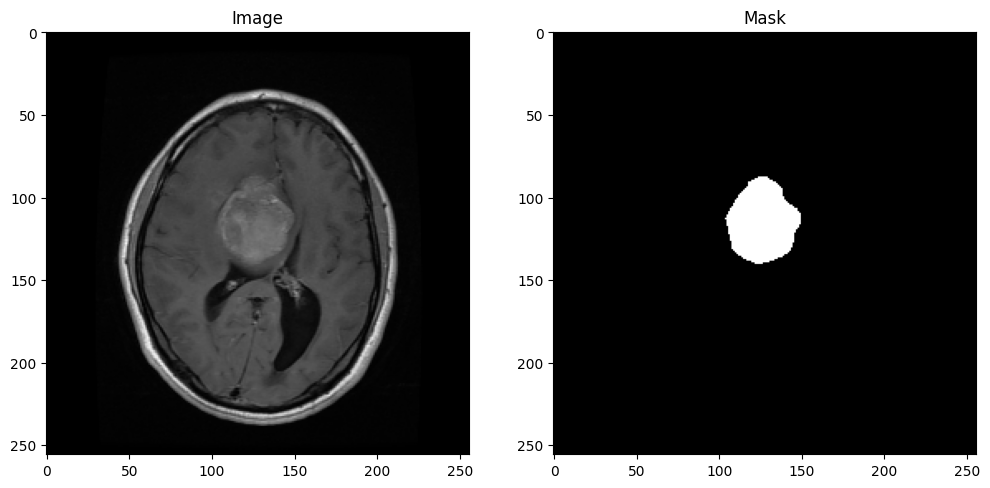

In [ ]:
#######################################################
# Sanity check: Visualize some images and their corresponding masks
image_number = random.randint(0, len(X_train))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(np.reshape(X_train[image_number], (SIZE, SIZE, 3)))  # Display image
plt.title('Image')
plt.subplot(122)
plt.imshow(np.reshape(y_train[image_number], (SIZE, SIZE)), cmap='gray')  # Display mask
plt.title('Mask')
plt.show()
#######################################################

**10. Defining Image Dimensions**

1. **Extracting image height**:
   * The `IMG_HEIGHT` variable is assigned the height of the images in the dataset.
   ```python
   IMG_HEIGHT = image_dataset.shape[1]
   ```
   * **Purpose**:
     - Ensures the model knows the height of the input images, extracted from the dataset's shape.

2. **Extracting image width**:
   * The `IMG_WIDTH` variable is assigned the width of the images in the dataset.
   ```python
   IMG_WIDTH  = image_dataset.shape[2]
   ```
   * **Purpose**:
     - Provides the model with the input width, derived from the dataset dimensions.

3. **Extracting the number of image channels**:
   * The `IMG_CHANNELS` variable is assigned the number of channels in the images (e.g., 3 for RGB).
   ```python
   IMG_CHANNELS = image_dataset.shape[3]
   ```
   * **Purpose**:
     - Informs the model about the input's channel depth, typically 3 for RGB or 1 for grayscale images.

4. **Explanation**:
   * `image_dataset.shape` provides the dimensions of the dataset in the format `(num_images, height, width, channels)`.
   * This ensures the model dynamically adapts to the dataset's actual dimensions without hardcoding values.

   **Example**:
   If `image_dataset.shape = (100, 256, 256, 3)`:
   - `IMG_HEIGHT = 256`
   - `IMG_WIDTH = 256`
   - `IMG_CHANNELS = 3`

In [ ]:
#######################################################
IMG_HEIGHT = image_dataset.shape[1]
IMG_WIDTH  = image_dataset.shape[2]
IMG_CHANNELS = image_dataset.shape[3]
#######################################################

**11. U-Net Model Definition**
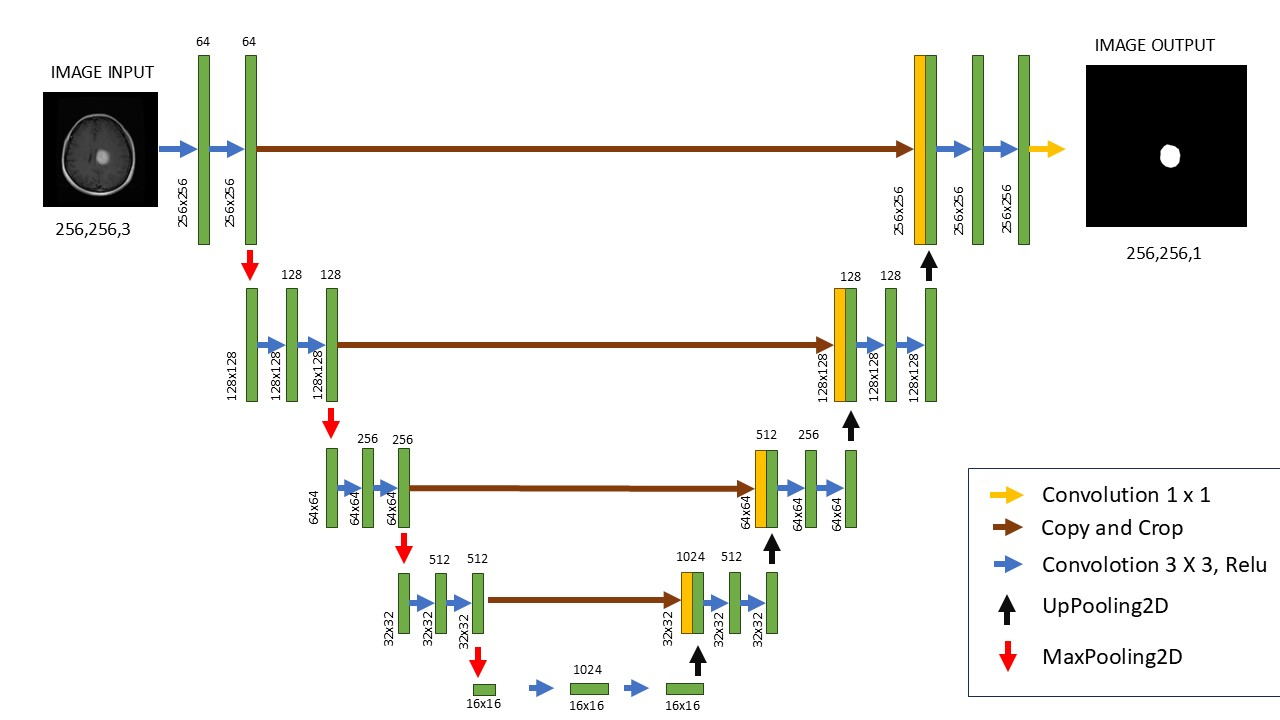
1. **Defining the U-Net model**:
   * The `simple_unet_model` function defines a U-Net architecture for image segmentation tasks.
   ```python
   def simple_unet_model(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS):
       inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
   ```
   * **Inputs**:
     - `IMG_HEIGHT`, `IMG_WIDTH`, and `IMG_CHANNELS` specify the dimensions of the input image.

2. **Contraction Path (Encoder)**:
   * The encoder progressively reduces the spatial dimensions while increasing the number of feature channels.
   ```python
   # Layer block 1
   c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(inputs)
   c1 = Dropout(0.1)(c1)
   c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(c1)
   p1 = MaxPooling2D((2, 2))(c1)
   ```
   * **Process**:
     - Two convolutional layers with ReLU activation are applied.
     - A `Dropout` layer helps prevent overfitting.
     - Max pooling reduces spatial dimensions by half.
   * **Layers**:
     - `Conv2D`: Extracts spatial features with a kernel size of `(3, 3)`.
     - `MaxPooling2D`: Reduces image dimensions while retaining important features.
   * This pattern is repeated with increasing filters (32, 64, 128, 256).

3. **Bottleneck**:
   * The bottleneck serves as the transition between encoder and decoder.
   ```python
   c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(p4)
   c5 = Dropout(0.3)(c5)
   c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(c5)
   ```
   * **Details**:
     - The number of filters is highest here (256), capturing complex spatial patterns.
     - Dropout is increased to 30% to handle high feature density.

4. **Expansion Path (Decoder)**:
   * The decoder progressively upsamples the feature maps and concatenates them with the corresponding encoder outputs.
   ```python
   u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
   u6 = concatenate([u6, c4])
   c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(u6)
   ```
   * **Layers**:
     - `Conv2DTranspose`: Performs transposed convolution for upsampling.
     - `concatenate`: Merges decoder features with corresponding encoder features to retain spatial information.
   * This pattern is repeated, decreasing the number of filters (128, 64, 32, 16) until the original resolution is restored.

5. **Output Layer**:
   * The final layer outputs a single-channel binary mask using the sigmoid activation function.
   ```python
   outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)
   ```
   * **Details**:
     - `Conv2D(1, (1, 1))`: Reduces the channels to 1 for binary segmentation.
     - `sigmoid`: Maps the output to a range of [0, 1], representing probabilities.

6. **Compiling the Model**:
   * The model is compiled with the Adam optimizer, binary crossentropy loss, and accuracy as a metric.
   ```python
   model.compile(optimizer=Adam(learning_rate=1e-3), loss='binary_crossentropy', metrics=['accuracy'])
   ```
   * **Details**:
     - `Adam`: An adaptive optimizer for efficient weight updates.
     - `binary_crossentropy`: Suitable for binary segmentation tasks.

7. **Model Summary**:
   * The model structure is printed for verification.
   ```python
   model.summary()
   ```

8. **Return the Model**:
   * The compiled model is returned.
   ```python
   return model
   ```

   **Purpose**:
   - The U-Net model efficiently captures spatial and contextual features, making it ideal for segmentation tasks like medical imaging or object detection.

In [ ]:
# U-Net Model Definition
def simple_unet_model(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS):
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))

    # Contraction path
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(inputs)
    c1 = Dropout(0.1)(c1)
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(p1)
    c2 = Dropout(0.1)(c2)
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(c4)
    p4 = MaxPooling2D(pool_size=(2, 2))(c4)

    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(c5)

    # Expansive path
    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(c6)

    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(c7)

    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(u8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(c8)

    u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1])
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(u9)
    c9 = Dropout(0.1)(c9)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(c9)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer=Adam(learning_rate=1e-3), loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()

    return model

**12. Initializing and Training the U-Net Model**

1. **Initializing the U-Net model**:
   * The `simple_unet_model` function is called with the image dimensions to create an instance of the U-Net model.
   ```python
   model = simple_unet_model(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)
   ```
   * **Parameters**:
     - `IMG_HEIGHT`: Height of the input images.
     - `IMG_WIDTH`: Width of the input images.
     - `IMG_CHANNELS`: Number of channels in the input images (e.g., 3 for RGB).
   * **Outcome**:
     - The model architecture is built, compiled, and ready for training.

2. **Training the U-Net model**:
   * The `fit` function trains the model using the input images and masks.
   ```python
   history = model.fit(image_dataset, mask_dataset,
                       batch_size=32,
                       epochs=100,
                       verbose=1,
                       validation_split=0.2)
   ```
   * **Parameters**:
     - `image_dataset`: Input images used for training.
     - `mask_dataset`: Corresponding ground truth masks for the input images.
     - `batch_size=32`: Specifies that 32 samples are processed at a time during training.
     - `epochs=100`: The model will iterate 100 times over the entire dataset.
     - `verbose=1`: Provides detailed progress output during training.
     - `validation_split=0.2`: Reserves 20% of the training data for validation to monitor the model's performance on unseen data.

3. **Resulting Output**:
   * **Training History**:
     - The `history` object contains details about training, such as loss and accuracy for both training and validation sets.
   * **Purpose**:
     - Training optimizes the model's weights to minimize the loss function and improve accuracy, preparing it for segmentation tasks.

In [ ]:
#######################################################
# Initialize model
model = simple_unet_model(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)
#######################################################
# Train the model
history = model.fit(image_dataset, mask_dataset,
                    batch_size=32,
                    epochs=100,
                    verbose=1,
                    validation_split=0.2)  # Use 20% of data for validation
#######################################################

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 256, 256, 16)   │            448 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 256, 256, 16)   │              0 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 256, 256, 16)   │          2,320 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 128, 128, 16)   │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 128, 128, 32)   │          4,640 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 128, 128, 32)   │              0 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 128, 128, 32)   │          9,248 │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 64, 64, 32)     │              0 │ conv2d_3[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 64, 64, 64)     │         18,496 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 64, 64, 64)     │              0 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 64, 64, 64)     │         36,928 │ dropout_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 32, 32, 64)     │              0 │ conv2d_5[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 32, 32, 128)    │         73,856 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 32, 32, 128)    │              0 │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 32, 32, 128)    │        147,584 │ dropout_3[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3           │ (None, 16, 16, 128)    │              0 │ conv2d_7[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)    

 Total params: 1,941,105 (7.40 MB)

 Trainable params: 1,941,105 (7.40 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 43s 8s/step - accuracy: 0.5496 - loss: 0.6867 - val_accuracy: 0.9802 - val_loss: 0.6060
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9818 - loss: 0.5384 - val_accuracy: 0.9798 - val_loss: 0.3492
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.9830 - loss: 0.4132 - val_accuracy: 0.9805 - val_loss: 0.3726
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.9836 - loss: 0.2812 - val_accuracy: 0.9805 - val_loss: 0.2102
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9843 - loss: 0.2181 - val_accuracy: 0.9805 - val_loss: 0.2379
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9850 - loss: 0.1591 - val_accuracy: 0.9805 - val_loss: 0.1767
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9846 - loss: 0.1325 - val_accuracy: 0.9805 - val_loss: 0.1679
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.9854 - loss: 0.0976 - val_accuracy: 0.9805 - val_loss: 

**13. Saving Training History to a CSV File**

1. **Creating a DataFrame for the training history**:
   * The `history.history` attribute is converted into a pandas DataFrame.
   ```python
   unet_history_df = pd.DataFrame(history.history)
   ```
   * **Details**:
     - `history.history` contains the training and validation metrics (e.g., loss, accuracy) for each epoch.
     - Converting it into a DataFrame organizes the data for easier analysis and export.

2. **Saving the training history to a CSV file**:
   * The DataFrame is saved as a CSV file using the `to_csv()` method.
   ```python
   with open('unet_history_df.csv', mode='w') as f:
       unet_history_df.to_csv(f)
   ```
   * **Details**:
     - The file is opened in write mode (`mode='w'`), ensuring any existing file with the same name is overwritten.
     - The training history is exported to `unet_history_df.csv`, enabling further analysis or documentation.

3. **Purpose**:
   * Storing the training history provides a persistent record of the model's performance across epochs.
   * It allows for:
     - Plotting metrics such as loss and accuracy trends.
     - Comparing the performance of different model configurations.
     - Debugging or revisiting results after training is complete.

In [ ]:
#######################################################
unet_history_df = pd.DataFrame(history.history)
with open('unet_history_df.csv', mode='w') as f:
    unet_history_df.to_csv(f)
#######################################################

**14. Plotting Training and Validation Loss and Accuracy**

1. **Plotting Training and Validation Loss**:
   * This section visualizes the training and validation loss for each epoch.
   ```python
   loss = history.history['loss']
   val_loss = history.history['val_loss']
   epochs = range(1, len(loss) + 1)
   plt.plot(epochs, loss, 'y', label='Training loss')
   plt.plot(epochs, val_loss, 'r', label='Validation loss')
   plt.title('Training and validation loss')
   plt.xlabel('Epochs')
   plt.ylabel('Loss')
   plt.legend()
   plt.show()
   ```
   * **Steps**:
     - Extract the `loss` (training) and `val_loss` (validation) from `history.history`.
     - Define the `epochs` range using the number of loss values.
     - Plot:
       - `loss` in yellow (`'y'`) for training loss.
       - `val_loss` in red (`'r'`) for validation loss.
     - Add labels and a legend to identify the curves.
     - Use `plt.show()` to display the plot.

   * **Purpose**:
     - To monitor overfitting or underfitting by comparing training and validation loss trends.

2. **Plotting Training and Validation Accuracy**:
   * This section visualizes the training and validation accuracy for each epoch.
   ```python
   acc = history.history['accuracy']
   val_acc = history.history['val_accuracy']
   plt.plot(epochs, acc, 'y', label='Training Accuracy')
   plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
   plt.title('Training and validation Accuracy')
   plt.xlabel('Epochs')
   plt.ylabel('Accuracy')
   plt.legend()
   plt.show()
   ```
   * **Steps**:
     - Extract the `accuracy` (training) and `val_accuracy` (validation) from `history.history`.
     - Use the same `epochs` range as defined earlier.
     - Plot:
       - `accuracy` in yellow (`'y'`) for training accuracy.
       - `val_accuracy` in red (`'r'`) for validation accuracy.
     - Add labels, a legend, and display the plot.

   * **Purpose**:
     - To track how well the model is learning by observing the accuracy improvement during training and validation.

3. **Outcome**:
   * These plots provide insights into the model's performance trends, helping to:
     - Detect overfitting (e.g., increasing validation loss while training loss decreases).
     - Identify epochs where accuracy saturates, signaling the need for early stopping or further tuning.

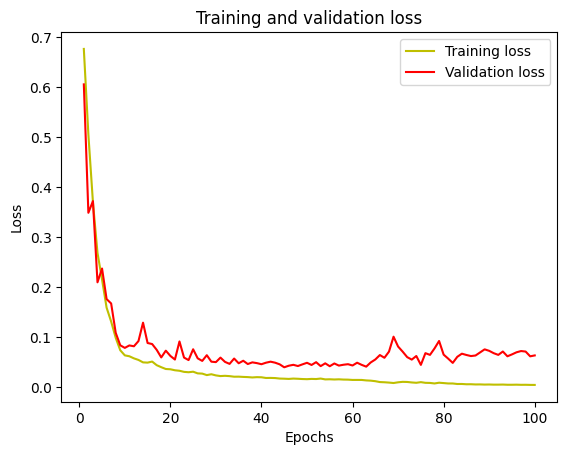

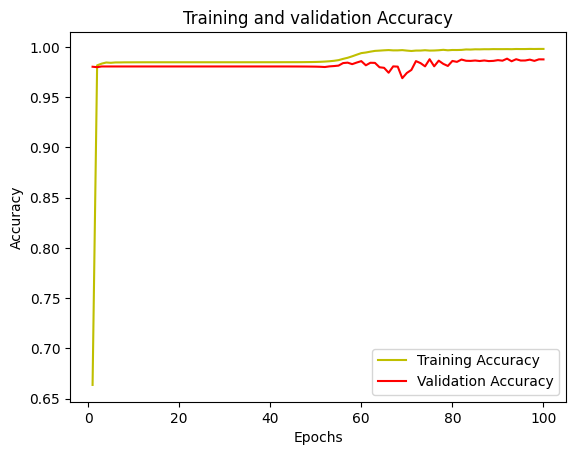

In [ ]:
#######################################################
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
#######################################################

#######################################################
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
##############################################################################################################

**15. Visualizing Training History: Combined Accuracy and Loss**

1. **Setting up the visualization**:
   * A single plot is used to visualize both training and validation accuracy and loss trends.
   ```python
   plt.figure(figsize=(12, 6))
   ```
   * **Details**:
     - `figsize=(12, 6)` specifies the size of the plot, making it wide enough to clearly display the data.

2. **Plotting training and validation accuracy**:
   * The `accuracy` and `val_accuracy` metrics from the training history are plotted.
   ```python
   plt.plot(history.history['accuracy'], label='Train Accuracy')
   plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
   ```
   * **Details**:
     - The `accuracy` curve shows how well the model performs on the training data.
     - The `val_accuracy` curve indicates performance on the validation data.

3. **Plotting training and validation loss**:
   * Similarly, `loss` and `val_loss` metrics are added to the plot.
   ```python
   plt.plot(history.history['loss'], label='Train Loss')
   plt.plot(history.history['val_loss'], label='Validation Loss')
   ```
   * **Details**:
     - The `loss` curve tracks the model's error on the training data.
     - The `val_loss` curve shows error on the validation data.

4. **Adding titles and labels**:
   * Titles and axis labels provide context for the plot.
   ```python
   plt.title('Training and Validation Accuracy and Loss')
   plt.xlabel('Epochs')
   plt.ylabel('Accuracy / Loss')
   ```
   * **Details**:
     - `Epochs` is used as the x-axis to represent training iterations.
     - `Accuracy / Loss` is used as the y-axis to unify the two types of metrics.

5. **Adding a legend**:
   * The `legend` makes it easy to distinguish between the curves.
   ```python
   plt.legend()
   ```

6. **Displaying the plot**:
   * The `plt.show()` function renders the combined plot.
   ```python
   plt.show()
   ```

7. **Purpose**:
   * This visualization helps in:
     - Comparing training and validation performance across epochs.
     - Detecting overfitting or underfitting (e.g., divergence between training and validation metrics).
     - Monitoring overall training progress in a compact and unified view.



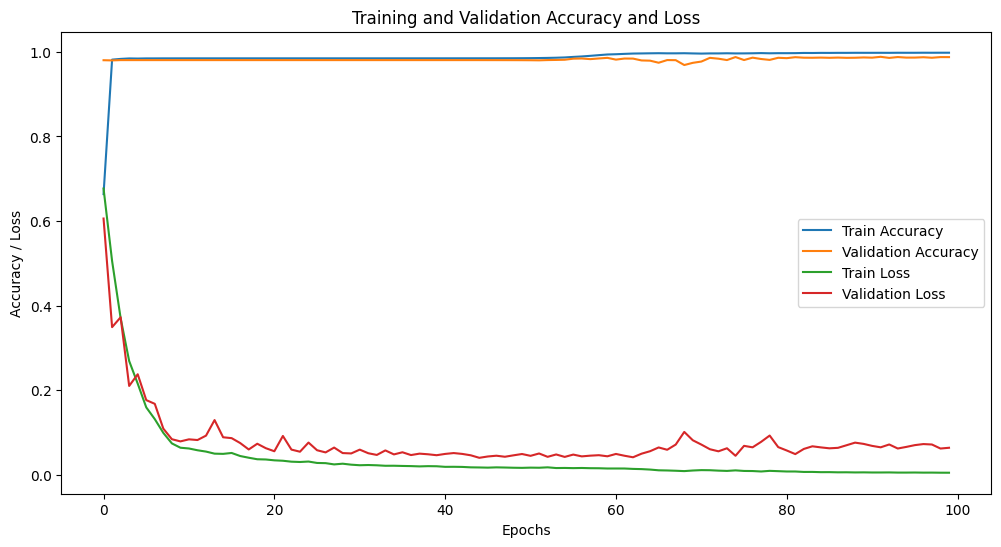

In [ ]:
#######################################################
# Visualize training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Accuracy and Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.legend()
plt.show()
#######################################################

**16. Visualizing Predictions on Test Data**


1. **Selecting a test image and its ground truth**:
   * A specific test image and its corresponding ground truth mask are selected from the test dataset.
   ```python
   test_img = X_test[7]
   ground_truth = y_test[7]
   ```
   * **Details**:
     - `X_test[7]` is the 7th image from the test set.
     - `y_test[7]` is the corresponding ground truth mask for the selected image.

2. **Preparing the test image for prediction**:
   * The test image is expanded to match the input shape expected by the model.
   ```python
   test_img_input = np.expand_dims(test_img, 0)
   ```
   * **Details**:
     - `np.expand_dims()` adds an additional batch dimension, as the model expects inputs in the shape `(batch_size, height, width, channels)`.

3. **Generating the prediction**:
   * The model predicts the segmentation mask for the test image.
   ```python
   prediction = (model.predict(test_img_input)[0, :, :, 0] > 0.5).astype(np.uint8)
   ```
   * **Details**:
     - `model.predict(test_img_input)` outputs the predicted mask.
     - `[0, :, :, 0]` extracts the first (and only) batch and the single channel of the output.
     - `( > 0.5).astype(np.uint8)` applies a threshold of 0.5 to convert probabilities to binary values (0 or 1).

4. **Setting up the visualization**:
   * A figure with three subplots is created to display the test image, ground truth, and prediction.
   ```python
   plt.figure(figsize=(16, 8))
   ```

5. **Displaying the test image**:
   * The test image is displayed in the first subplot.
   ```python
   plt.subplot(231)
   plt.title('Testing Image')
   plt.imshow(test_img, cmap='gray')
   ```
   * **Details**:
     - `cmap='gray'` renders the image in grayscale.

6. **Displaying the ground truth mask**:
   * The ground truth segmentation mask is displayed in the second subplot.
   ```python
   plt.subplot(232)
   plt.title('Testing Label')
   plt.imshow(ground_truth[:, :, 0], cmap='gray')
   ```
   * **Details**:
     - The mask is displayed in grayscale, with the correct spatial alignment.

7. **Displaying the prediction**:
   * The model’s prediction is displayed in the third subplot.
   ```python
   plt.subplot(233)
   plt.title('Prediction on test image')
   plt.imshow(prediction, cmap='gray')
   ```

8. **Rendering the visualization**:
   * The `plt.show()` function displays the figure.
   ```python
   plt.show()
   ```

9. **Purpose**:
   * This visualization allows comparison between:
     - The original test image.
     - The ground truth mask.
     - The predicted segmentation mask.
   * It provides qualitative insights into the model's performance on unseen data.

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


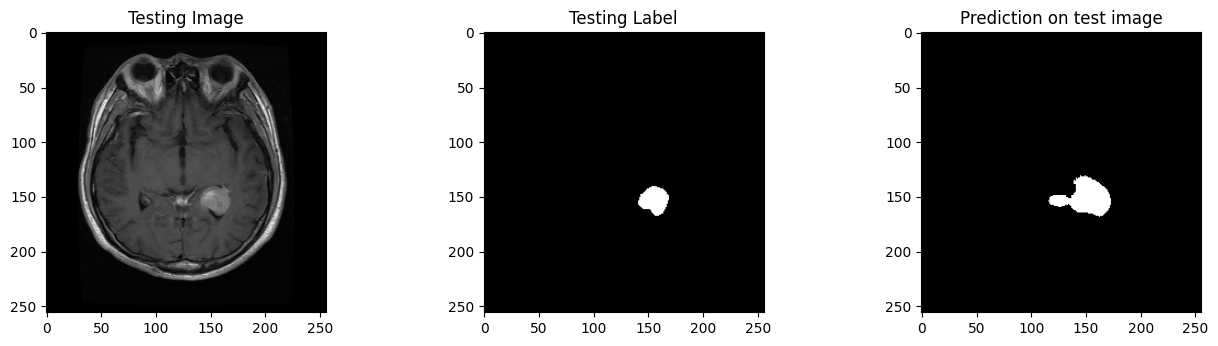

In [ ]:
#######################################################
test_img = X_test[7]
ground_truth=y_test[7]
test_img_input=np.expand_dims(test_img, 0)
prediction = (model.predict(test_img_input)[0,:,:,0] > 0.5).astype(np.uint8)

plt.figure(figsize=(16, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img, cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='gray')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(prediction, cmap='gray')

plt.show()
#######################################################

  **17. Calculating the Intersection over Union (IoU) for a Single Image**

  1. **Defining the number of classes**:
    * The number of classes in the segmentation task is specified.
    ```python
    n_classes = 2
    ```
    * **Details**:
      - For binary segmentation, the number of classes is `2` (background and foreground).

  2. **Initializing the MeanIoU metric**:
    * An instance of the `MeanIoU` metric is created from TensorFlow Keras.
    ```python
    IOU_keras = MeanIoU(num_classes=n_classes)
    ```
    * **Details**:
      - `MeanIoU` computes the Intersection over Union (IoU) for each class and averages the values across all classes.
      - `num_classes` specifies the number of segmentation classes.

  3. **Updating the metric state with ground truth and prediction**:
    * The `update_state` method is used to calculate IoU for the given ground truth and predicted mask.
    ```python
    IOU_keras.update_state(ground_truth[:, :, 0], prediction)
    ```
    * **Details**:
      - `ground_truth[:, :, 0]` extracts the ground truth mask for comparison.
      - `prediction` is the binary mask predicted by the model.

  4. **Printing the Mean IoU**:
    * The IoU value is computed and printed.
    ```python
    print("Mean IoU =", IOU_keras.result().numpy())
    ```
    * **Details**:
      - `IOU_keras.result()` returns the calculated IoU.
      - `.numpy()` converts the TensorFlow tensor to a NumPy value for display.

  5. **Purpose**:
    * The Intersection over Union (IoU) is a critical metric for segmentation tasks, measuring the overlap between the predicted and ground truth masks.
    * It provides a numerical evaluation of the model's performance for a specific test image:
      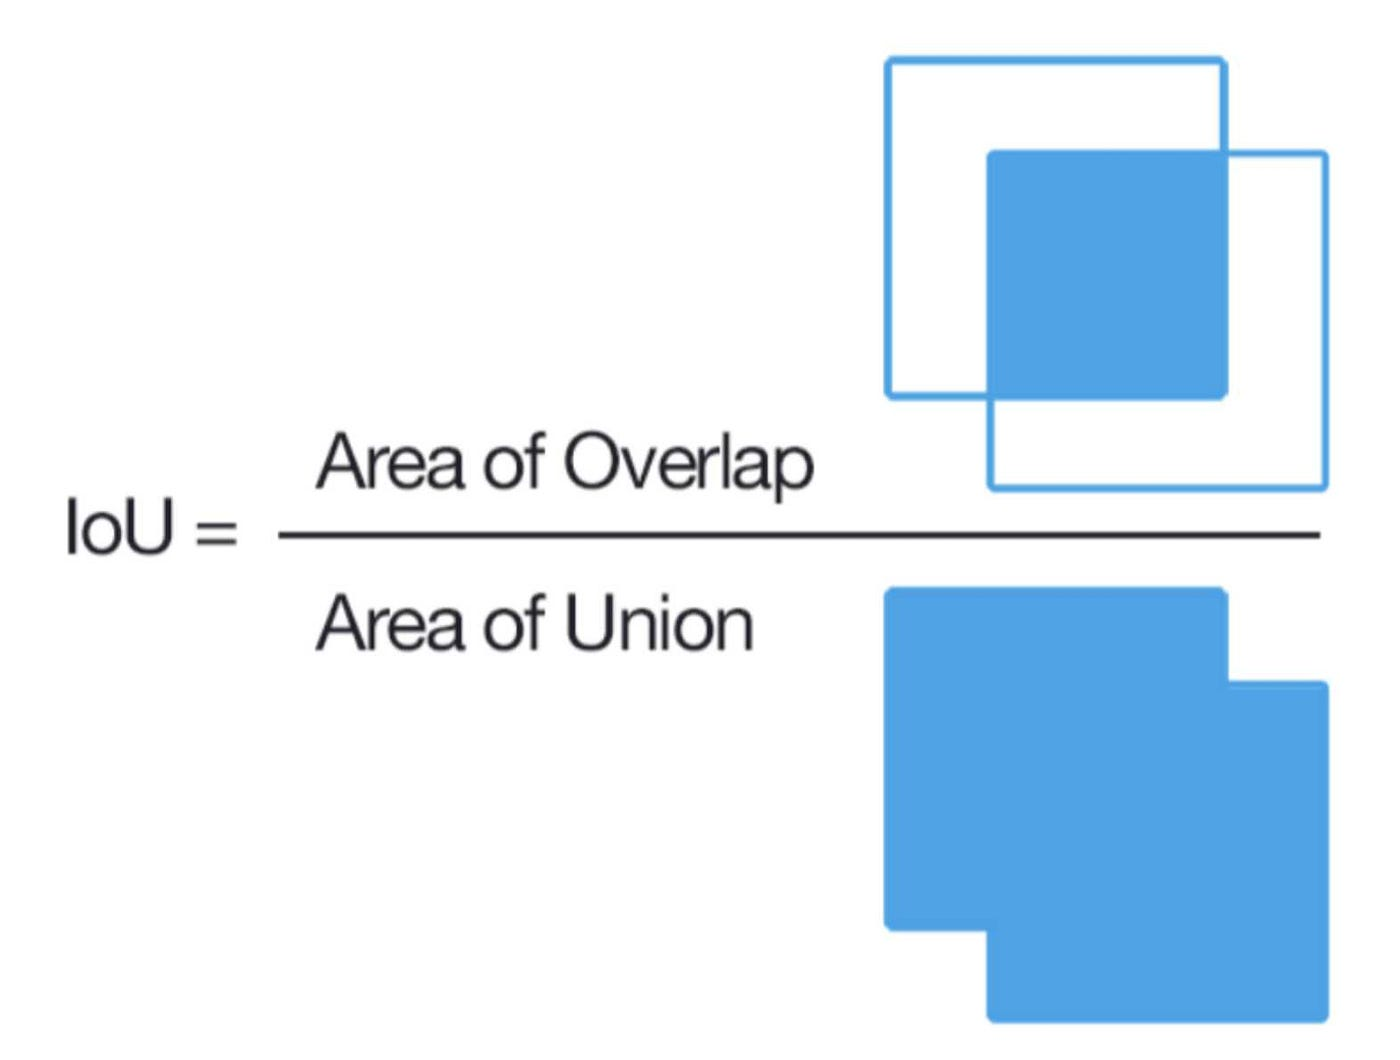
      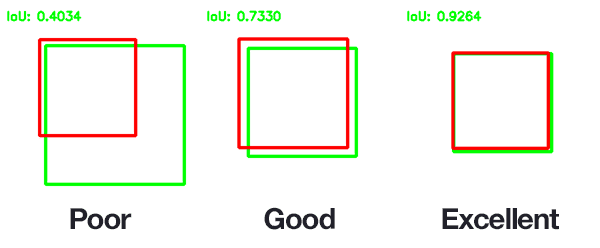

In [ ]:
#######################################################
#IoU for a single image
#######################################################
n_classes = 2
IOU_keras = MeanIoU(num_classes=n_classes)
IOU_keras.update_state(ground_truth[:,:,0], prediction)
print("Mean IoU =", IOU_keras.result().numpy())
#######################################################

Mean IoU = 0.71674794


**18. Calculating IoU for All Test Images and Computing the Average**

1. **Initializing a list to store IoU values**:
   * An empty list, `IoU_values`, is created to store the IoU for each test image.
   ```python
   IoU_values = []
   ```

2. **Iterating through the test set**:
   * A loop is used to process each image in the test set.
   ```python
   for img in range(0, X_test.shape[0]):
       temp_img = X_test[img]
       ground_truth = y_test[img]
   ```
   * **Details**:
     - `X_test.shape[0]` gives the total number of test images.
     - `temp_img` is the current test image.
     - `ground_truth` is the corresponding ground truth mask.

3. **Preparing the image for prediction**:
   * Each test image is expanded to match the input shape expected by the model.
   ```python
   temp_img_input = np.expand_dims(temp_img, 0)
   ```
   * **Details**:
     - This ensures the input shape is `(batch_size, height, width, channels)`.

4. **Generating predictions**:
   * The model predicts the segmentation mask for the current test image.
   ```python
   prediction = (model.predict(temp_img_input)[0, :, :, 0] > 0.5).astype(np.uint8)
   ```
   * **Details**:
     - Predictions are thresholded at `0.5` and converted to binary masks (`0` or `1`).

5. **Calculating IoU for the current image**:
   * The `MeanIoU` metric is used to compute IoU for the current image.
   ```python
   IoU = MeanIoU(num_classes=n_classes)
   IoU.update_state(ground_truth[:, :, 0], prediction)
   IoU = IoU.result().numpy()
   ```
   * **Details**:
     - `IoU.update_state()` updates the metric with the ground truth and prediction.
     - `IoU.result().numpy()` retrieves the IoU value as a scalar.

6. **Storing the IoU value**:
   * The computed IoU is appended to the `IoU_values` list.
   ```python
   IoU_values.append(IoU)
   ```

7. **Creating a DataFrame of IoU values**:
   * The IoU values are converted into a pandas DataFrame.
   ```python
   df = pd.DataFrame(IoU_values, columns=["IoU"])
   ```
   * **Details**:
     - This allows for further analysis and manipulation of the IoU values.

8. **Filtering out invalid IoU values**:
   * Any IoU value of `1.0` (typically an outlier) is removed.
   ```python
   df = df[df.IoU != 1.0]
   ```

9. **Calculating the mean IoU**:
   * The mean IoU is computed from the filtered values.
   ```python
   mean_IoU = df.mean().values
   print("Mean IoU is: ", mean_IoU)
   ```
   * **Details**:
     - `df.mean()` computes the mean of all valid IoU values.
     - The result is converted to a NumPy array for display.

10. **Purpose**:
    * This process evaluates the segmentation performance across the entire test set by computing and averaging the IoU values for all test images.
    * **Outcome**:
      - The mean IoU provides an overall measure of model performance. A higher mean IoU indicates better segmentation quality.

In [ ]:
#######################################################
#Calculate IoU and average
#######################################################
IoU_values = []
for img in range(0, X_test.shape[0]):
    temp_img = X_test[img]
    ground_truth=y_test[img]
    temp_img_input=np.expand_dims(temp_img, 0)
    prediction = (model.predict(temp_img_input)[0,:,:,0] > 0.5).astype(np.uint8)

    IoU = MeanIoU(num_classes=n_classes)
    IoU.update_state(ground_truth[:,:,0], prediction)
    IoU = IoU.result().numpy()
    IoU_values.append(IoU)

    #print(IoU)

df = pd.DataFrame(IoU_values, columns=["IoU"])
df = df[df.IoU != 1.0]
mean_IoU = df.mean().values
print("Mean IoU is: ", mean_IoU)
#######################################################

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Mean IoU is:  [0.58504134]


**19. Evaluating Segmentation Metrics for Test Dataset**

1. **Importing required metrics**:
   * Metrics for segmentation evaluation are imported from `sklearn.metrics`.
   ```python
   from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
   ```

2. **Initializing lists to store metrics**:
   * Lists are created to store IoU, precision, recall, F1-score, and accuracy for each test image.
   ```python
   IoU_values = []
   precision_values = []
   recall_values = []
   f1_values = []
   accuracy_values = []
   ```

3. **Iterating through the test dataset**:
   * A loop is used to calculate metrics for each test image and its corresponding ground truth.
   ```python
   for img in range(0, X_test.shape[0]):
       temp_img = X_test[img]
       ground_truth = y_test[img]
   ```
   * **Details**:
     - `temp_img` is the current test image.
     - `ground_truth` is the corresponding ground truth mask.

4. **Preparing the image for prediction**:
   * The test image is expanded to match the input shape expected by the model.
   ```python
   temp_img_input = np.expand_dims(temp_img, 0)
   ```

5. **Generating predictions**:
   * The model predicts the segmentation mask for the test image.
   ```python
   prediction = (model.predict(temp_img_input)[0, :, :, 0] > 0.5).astype(np.uint8)
   ```

6. **Calculating IoU**:
   * The `MeanIoU` metric computes the IoU for the predicted mask.
   ```python
   IoU = MeanIoU(num_classes=n_classes)
   IoU.update_state(ground_truth[:, :, 0], prediction)
   IoU_value = IoU.result().numpy()
   IoU_values.append(IoU_value)
   ```

7. **Flattening ground truth and prediction**:
   * Ground truth and prediction masks are flattened for calculating other metrics.
   ```python
   gt_flat = ground_truth[:, :, 0].flatten()
   pred_flat = prediction.flatten()
   ```

8. **Calculating precision, recall, F1-score, and accuracy**:
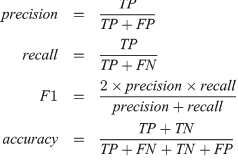
   * The flattened arrays are used to calculate the metrics.
   ```python
   precision = precision_score(gt_flat, pred_flat, zero_division=0)
   recall = recall_score(gt_flat, pred_flat, zero_division=0)
   f1 = f1_score(gt_flat, pred_flat, zero_division=0)
   accuracy = accuracy_score(gt_flat, pred_flat)
   ```
   * **Details**:
     - `precision_score`: Measures the proportion of true positives out of all predicted positives.
     - `recall_score`: Measures the proportion of true positives out of all actual positives.
     - `f1_score`: Harmonic mean of precision and recall.
     - `accuracy_score`: Measures the proportion of correctly predicted pixels.

9. **Appending metrics to their respective lists**:
   ```python
   precision_values.append(precision)
   recall_values.append(recall)
   f1_values.append(f1)
   accuracy_values.append(accuracy)
   ```

10. **Creating a DataFrame for metrics**:
    * A pandas DataFrame is created to organize all metrics.
    ```python
    metrics_df = pd.DataFrame({
        "IoU": IoU_values,
        "Precision": precision_values,
        "Recall": recall_values,
        "F1-Score": f1_values,
        "Accuracy": accuracy_values
    })
    ```

11. **Calculating mean metrics**:
    * The mean values for all metrics are calculated and displayed.
    ```python
    mean_metrics = metrics_df.mean()
    print("Mean Metrics:")
    print(mean_metrics)
    ```

12. **Saving metrics to a CSV file**:
    * The DataFrame is saved to a CSV file for further analysis.
    ```python
    metrics_df.to_csv('segmentation_metrics_summary.csv', index=False)
    ```

13. **Purpose**:
    * This process evaluates multiple segmentation metrics across the entire test dataset, providing a comprehensive performance overview of the model.
    * **Outcome**:
      - The metrics are summarized and saved to a file for documentation and comparison purposes.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Initialize lists to store metrics for each image
IoU_values = []
precision_values = []
recall_values = []
f1_values = []
accuracy_values = []

# Loop through the test dataset
for img in range(0, X_test.shape[0]):
    temp_img = X_test[img]
    ground_truth = y_test[img]
    temp_img_input = np.expand_dims(temp_img, 0)

    # Generate prediction
    prediction = (model.predict(temp_img_input)[0, :, :, 0] > 0.5).astype(np.uint8)

    # Calculate IoU
    IoU = MeanIoU(num_classes=n_classes)
    IoU.update_state(ground_truth[:, :, 0], prediction)
    IoU_value = IoU.result().numpy()
    IoU_values.append(IoU_value)

    # Flatten ground truth and prediction for metric calculations
    gt_flat = ground_truth[:, :, 0].flatten()
    pred_flat = prediction.flatten()

    # Calculate metrics
    precision = precision_score(gt_flat, pred_flat, zero_division=0)
    recall = recall_score(gt_flat, pred_flat, zero_division=0)
    f1 = f1_score(gt_flat, pred_flat, zero_division=0)
    accuracy = accuracy_score(gt_flat, pred_flat)

    # Append metrics to their respective lists
    precision_values.append(precision)
    recall_values.append(recall)
    f1_values.append(f1)
    accuracy_values.append(accuracy)

# Create a DataFrame to store all metrics
metrics_df = pd.DataFrame({
    "IoU": IoU_values,
    "Precision": precision_values,
    "Recall": recall_values,
    "F1-Score": f1_values,
    "Accuracy": accuracy_values
})

# Calculate mean metrics
mean_metrics = metrics_df.mean()
print("Mean Metrics:")
print(mean_metrics)

# Save metrics to a CSV file
metrics_df.to_csv('segmentation_metrics_summary.csv', index=False)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Mean Metrics:
IoU          0.698309
Precision    0.463973
Recall       0.850500
F1-Score     0.543782
Accuracy     0.988033
dtype: float64


In [ ]:
model.save('Majdi.h5')